In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *
from tensorflow.keras import *
from tensorflow.keras.optimizers import *
from PIL import *
import os


/home/studentresearch/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2024-03-30 15:16:13.139220: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-30 15:16:13.215545: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compil

In [2]:
data_dir = os.path.expanduser("~/dataset/images")

train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=100,
    image_size=(256, 256),
    batch_size=256,
    shuffle=True,
    labels="inferred",
    label_mode="int"
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=100,
    image_size=(256, 256),
    batch_size=256,
    shuffle=True,
    labels="inferred",  
    label_mode="int" 
)

x_train, y_train = next(iter(train))
x_test, y_test = next(iter(test))

x_train = tf.cast(x_train, 'float32') / 255.0
x_test = tf.cast(x_test, 'float32') / 255.0

y_train_one_hot = to_categorical(y_train, 25)
y_test_one_hot = to_categorical(y_test, 25)

Found 4947 files belonging to 25 classes.
Using 3958 files for training.


2024-03-30 15:16:18.341722: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-03-30 15:16:18.341750: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: ithelp-Precision-5820-Tower
2024-03-30 15:16:18.341755: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: ithelp-Precision-5820-Tower
2024-03-30 15:16:18.341919: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 545.23.8
2024-03-30 15:16:18.341950: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  545.23.08  Release Build  (dvs-builder@U16-I3-A16-1-1)  Mon Nov  6 23:37:57 UTC 2023
GCC version:  gcc version 12.3.0 (Ubuntu 12.

Found 4947 files belonging to 25 classes.
Using 989 files for validation.


In [41]:
model = Sequential([
    Conv2D(64, (3, 3), 1, activation='relu', padding='same', input_shape = (256, 256, 3)),
    Conv2D(64, (3, 3), 1, activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2,2), padding='same'),

    Conv2D(128, (3, 3), 1, activation='relu', padding='same'),
    Conv2D(128, (3, 3), 1, activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2,2), padding='same'),

    Conv2D(256, (3, 3), 1, activation='relu', padding='same'),
    Conv2D(256, (3, 3), 1, activation='relu', padding='same'),
    Conv2D(256, (3, 3), 1, activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2,2), padding='same'),
    
    Conv2D(512, (3, 3), 1, activation='relu', padding='same'),
    Conv2D(512, (3, 3), 1, activation='relu', padding='same'),
    Conv2D(512, (3, 3), 1, activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2,2), padding='same'),
    
    Conv2D(512, (3, 3), 1, activation='relu', padding='same'),
    Conv2D(512, (3, 3), 1, activation='relu', padding='same'),
    Conv2D(512, (3, 3), 1, activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2,2), padding='same'),

    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(25, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)              │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4096)           │   134,221,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │       102,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,820,249 (632.55 MB)

 Trainable params: 165,820,249 (632.55 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.fit(x_train, y_train_one_hot, epochs=20, batch_size=8, validation_data=(x_test, y_test_one_hot))

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - loss: 3.6557 - val_loss: 3.1786
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - loss: 3.1245 - val_loss: 3.1723
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - loss: 3.1238 - val_loss: 3.1890
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - loss: 3.0618 - val_loss: 3.1764
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - loss: 3.1192 - val_loss: 3.1905
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - loss: 3.1294 - val_loss: 3.1972
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 3.0548 - val_loss: 3.1735
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - loss: 3.1028 - val_loss: 3.2174
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - loss: 3.1394 - val_loss: 3.1877
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - loss: 3.0931 - val_loss: 3.2000
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - loss: 3.1052 - val_loss: 3.1838
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - loss: 3.1280 - val_lo

In [43]:
model.save("PleaseWork.keras")

In [3]:
model = load_model("PleaseWork.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


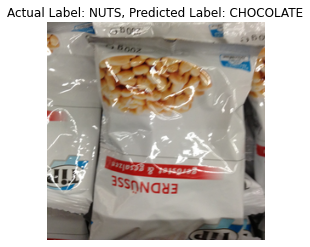

In [13]:
random_index = np.random.randint(len(x_test))

random_image = x_test[random_index]
actual_label = y_test[random_index]

random_image = np.expand_dims(random_image, axis=0)

predicted_label = model.predict(random_image)

predicted_label = np.argmax(predicted_label)

class_names = train.class_names

plt.imshow(random_image.squeeze())
plt.title(f"Actual Label: {class_names[actual_label]}, Predicted Label: {class_names[predicted_label]}")
plt.axis('off')
plt.show()